In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C://Users/naikp/Downloads/weather-stations.csv')
df.drop(['BS','DwBS','BS%','P%N', 'S%N','P%N','D','S','DwS','S_G', 'CDD'], axis=1, inplace=True)
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,1012573


In [3]:
df.shape

(1341, 15)

In [4]:
df.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD
count,1341.000000,1341.000000,1256.000000,1256.000000,1260.000000,1260.000000,1260.000000,1260.000000,1227.000000,1227.000000,1227.000000,1256.000000
mean,51.185221,-96.670827,-12.062341,2.186306,2.612302,1.814286,-26.322381,1.816667,50.402363,2.612062,7.480033,773.277150
std,6.216434,23.285512,10.416366,4.903077,8.855823,4.249613,12.573066,4.438321,62.312551,4.889425,4.740601,311.119277
min,41.949000,-140.868000,-38.200000,0.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,46.983000,-116.501000,-18.500000,0.000000,-3.500000,0.000000,-35.425000,0.000000,13.200000,0.000000,4.000000,560.100000
50%,49.850000,-101.400000,-13.800000,0.000000,2.500000,0.000000,-29.100000,0.000000,27.100000,0.000000,7.000000,813.500000
75%,53.283000,-73.750000,-5.600000,2.000000,10.000000,1.000000,-21.700000,1.000000,60.500000,3.000000,11.000000,988.000000
max,82.500000,-52.753000,9.600000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000


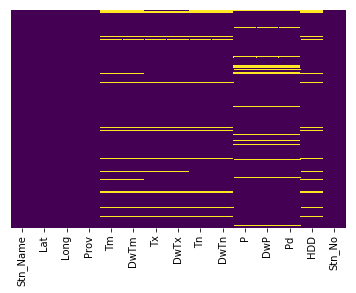

In [5]:
#df.isnull().sum()
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [6]:
import folium

m=folium.Map(tiles="CartoDB dark_matter",zoom_start=20) 

In [7]:
new_df = df[['Lat','Long','Tm','Tx','Tn']]
new_df.dropna(inplace=True)
X = new_df[['Tm','Tx','Tn']]

C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
from sklearn.cluster import DBSCAN
X = X.astype('float32', copy=False).values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Estimated number of clusters: 5
Estimated number of noise points: 318


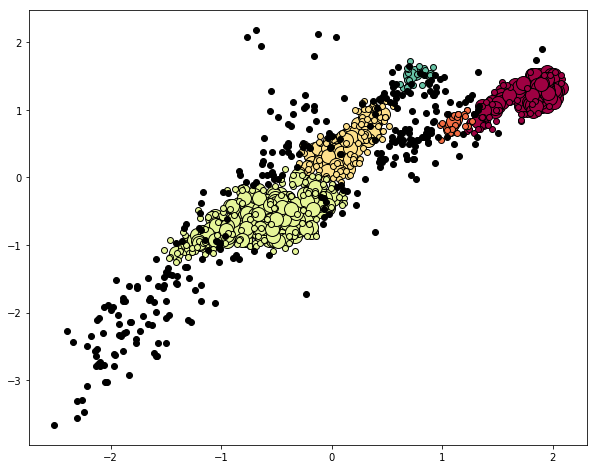

In [9]:
dbsc = DBSCAN(eps=.2, min_samples=15).fit(X)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_]=True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

In [10]:
#new_df=df[['Lat','Long']]
new_df['Labels']=dbsc.labels_
new_df.head()

C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Lat,Long,Tm,Tx,Tn,Labels
0,48.935,-123.742,8.2,13.5,1.0,0
1,48.824,-124.133,7.0,15.0,-3.0,0
2,48.829,-124.052,6.8,16.0,-2.5,0
4,48.735,-123.728,7.7,14.5,-1.0,0
5,48.432,-123.439,8.8,13.1,1.9,0


In [11]:
new_df['Labels'].value_counts()

 3    492
-1    318
 2    215
 0    177
 1     27
 4     26
Name: Labels, dtype: int64

In [12]:
for i in range(len(new_df)):
    if new_df['Labels'].iloc[i] == 0:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=10,color='black',fill=True,fill_color='blue', fill_opacity=0.7).add_to(m)
    elif new_df['Labels'].iloc[i] == -1:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=5,color='black', fill=True,fill_color='white', fill_opacity=0.7).add_to(m)
    elif new_df['Labels'].iloc[i] == 2:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=10,color='black', fill=True,fill_color='purple', fill_opacity=0.7).add_to(m)
    elif new_df['Labels'].iloc[i] == 3:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=10,color='black', fill=True,fill_color='teal', fill_opacity=0.7).add_to(m)
    elif new_df['Labels'].iloc[i] == 1:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=10,color='black', fill=True,fill_color='white', fill_opacity=0.7).add_to(m)
    else:
        folium.CircleMarker([new_df['Lat'].iloc[i],new_df['Long'].iloc[i]], radius=10,color='black', fill=True,fill_color='red', fill_opacity=0.7).add_to(m)
m